In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [46]:
def printImg(a, b):
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1), plt.imshow(a, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.subplot(1, 2, 2), plt.imshow(b, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def inverseFourier(spectrum):
    img_back = np.fft.ifftshift(spectrum)
    img_back = np.fft.ifft2(img_back)
    img_back = np.abs(img_back)
    return img_back

def fourier(img):
    f = np.fft.fft2(img)
    f = np.fft.fftshift(f)
    return f

def gaussianOne(size, intensity, img):
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    x = cv2.getGaussianKernel(size * 2, 300)
    gaussian = x * x.T
    mask2 = np.ones((rows, cols))
    mask2[crow - size:crow + size, ccol-size:ccol+size] = gaussian
    return mask2

def gaussianZero(size, intensity, img):
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    x = cv2.getGaussianKernel(size * 2, 300)
    gaussian = x * x.T
    mask2 = np.zeros((rows, cols))
    mask2[crow - size:crow + size, ccol-size:ccol+size] = gaussian
    return mask2

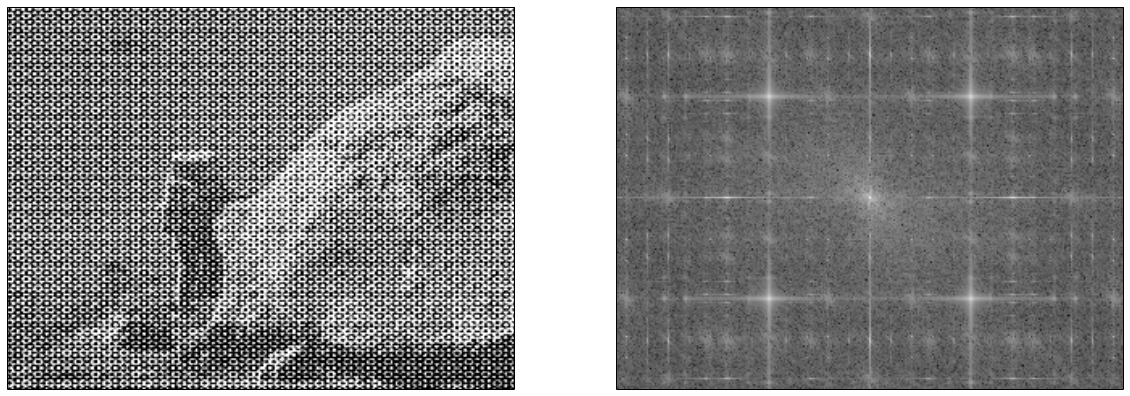

(237, 315)


In [5]:
# Load image and its frequency spectrum
img = cv2.imread('i7w0S.png', 0)

f = fourier(img)

magnitud = np.log(1 + np.abs(f))

printImg(img, magnitud)
print(img.shape)

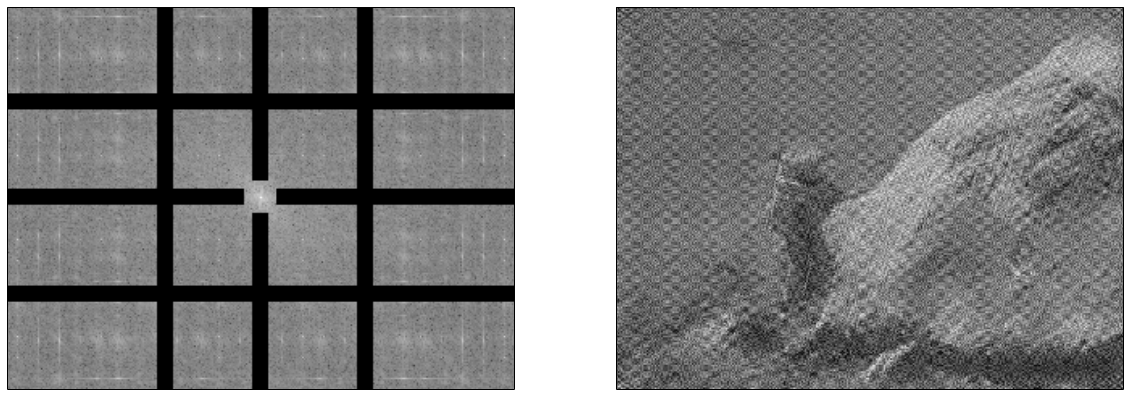

In [51]:
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2 # center row, center column

# Modifying spectrum
mask = np.ones((rows, cols), np.uint8)
## Removing vertical and horizontal high frequencies
n = 5
mask[0 : rows, ccol - n : ccol + n] = 0
mask[0 : rows, ccol // 2 + 20 - n : ccol // 2 + 20 + n] = 0
mask[0 : rows, ccol + 65 - n : ccol + n + 65] = 0
mask[crow - n : crow + n, 0 : cols] = 0
mask[crow // 2 - n : crow // 2 + n, 0 : cols] = 0
mask[ crow + 60 - n : crow + 60 + n, 0 : cols] = 0

        
## Center correction
n2 = 10
mask[crow - n2 : crow + n2, ccol-n2 : ccol + n2] = 1
#mask[crow - n2:crow + n2, ccol-n:ccol+n] = 1
#mask[crow-n:crow+n, ccol-n2:ccol+n2] = 1


## Gaussian mask
gaussian = gaussianZero(50, 300, img)

f_filter = f * mask #* gaussian

magnitude = np.log(1 + np.abs(f_filter))

img_back = inverseFourier(f_filter)


printImg(magnitude, img_back)